<a href="https://www.kaggle.com/code/yasinsoylu123/sign-language-cnn?scriptVersionId=116590112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [17]:
import pandas as pd
import numpy as np
from keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout , LeakyReLU
from sklearn.metrics import classification_report,confusion_matrix
import random


In [18]:
df_train=pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
df_test=pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [19]:
# Label Encoding 
from keras.utils.np_utils import to_categorical 

NumberofClass = 30
y_train = to_categorical(y_train, num_classes = NumberofClass)
y_test = to_categorical(y_test, num_classes = NumberofClass)

In [20]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([0., 1.], dtype=float32)

In [21]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [22]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [23]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


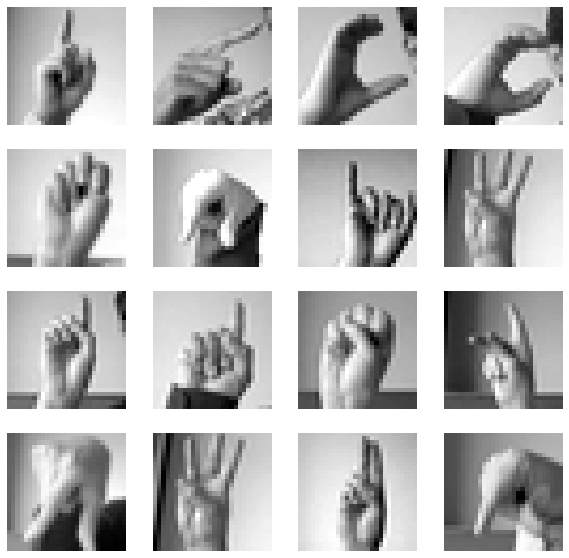

In [24]:
plt.figure(figsize=(10,10)) 

for i in range(16):
    plt.subplot(4,4,i+1)   
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")

plt.show()

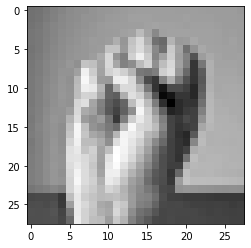

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10].reshape(28,28),cmap='gray')

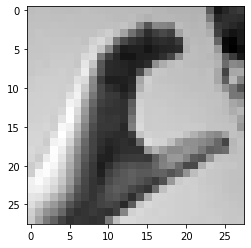

In [26]:
plt.imshow(x_train[2][:,:,0],cmap='gray')
plt.show()

In [27]:
x_train=x_train/255
x_test=x_test/255


In [28]:
batch_size = 128
num_classes = 30
epochs = 10

In [29]:
model = Sequential()


model.add(Conv2D(filters = 128, kernel_size = (4,4), padding = "Same", activation = "relu", input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units = num_classes, activation = "softmax"))

model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       2176      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        131136    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          32800     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 16)         

In [30]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%  0,1 best
        width_shift_range=0.1,  # randomly shift images horizontally 10%  +++
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [31]:
filepath="Sign_language_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max',patience=3)
callbacks_list = [checkpoint]

In [32]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size , callbacks=callbacks_list)

Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


214/214 [==============================] - 12s 52ms/step - loss: 3.1281 - accuracy: 0.0709 - val_loss: 1.7061 - val_accuracy: 0.4428

Epoch 00001: val_accuracy improved from -inf to 0.44283, saving model to Sign_language_detection.hdf5
Epoch 2/10
214/214 [==============================] - 12s 55ms/step - loss: 1.6313 - accuracy: 0.4443 - val_loss: 0.8360 - val_accuracy: 0.6948

Epoch 00002: val_accuracy improved from 0.44283 to 0.69479, saving model to Sign_language_detection.hdf5
Epoch 3/10
214/214 [==============================] - 11s 52ms/step - loss: 0.8975 - accuracy: 0.6822 - val_loss: 0.5140 - val_accuracy: 0.8293

Epoch 00003: val_accuracy improved from 0.69479 to 0.82934, saving model to Sign_language_detection.hdf5
Epoch 4/10
214/214 [==============================] - 11s 52ms/step - loss: 0.5478 - accuracy: 0.8040 - val_loss: 0.2200 - val_accuracy: 0.9110

Epoch 00004: val_accuracy improved from 0.82934 to 0.91104, saving model to Sign_language_detection.hdf5
Epoch 5/10
214

In [33]:
model.save('signn_language')


In [34]:
import cv2
from keras.preprocessing.image import img_to_array
alphabet=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [35]:
classify(x_train[3]*255)


'C'

In [36]:
print(y_train[3])


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [37]:
y_pred = model.predict(x_test)

y_pred2 = np.array([np.argmax(y_pred[i]) for i in range(len(y_pred))])
y_test2 = np.array([np.argmax(y_test[i]) for i in range(len(y_test))])

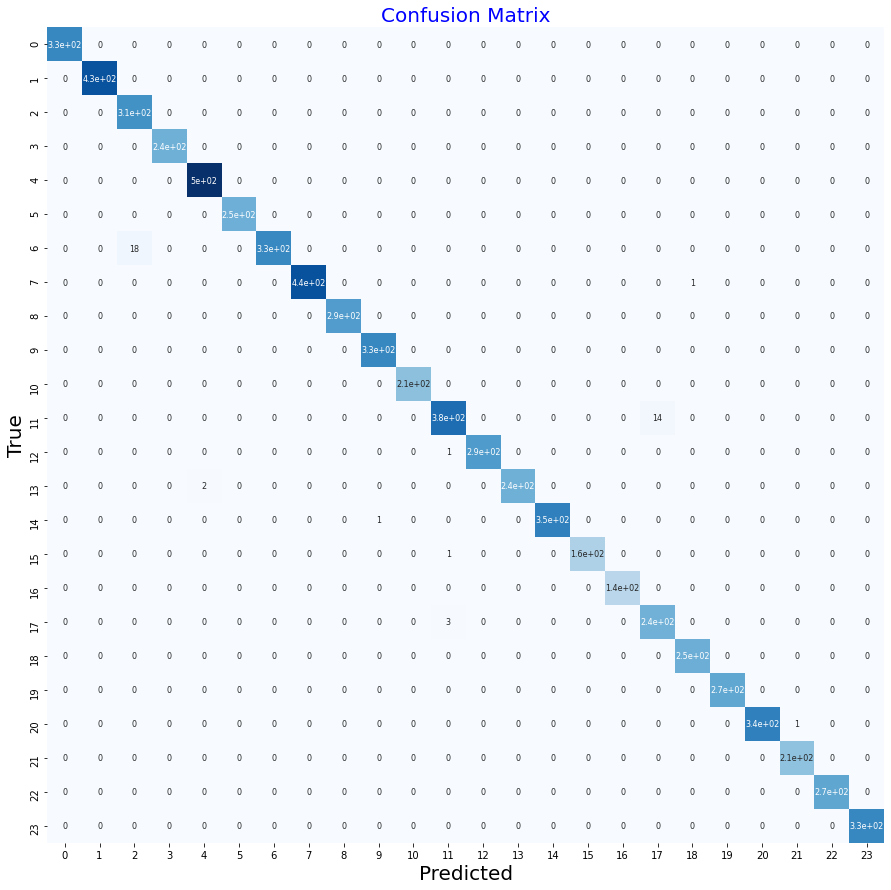

In [38]:
import seaborn as sns

plt.figure(figsize = (15,15))

sns.heatmap(confusion_matrix(y_test2,y_pred2),annot= True,cbar = False , cmap = 'Blues',annot_kws={'size' : 8})
plt.xlabel('Predicted',fontdict={'size': 20})
plt.ylabel('True' ,fontdict={'size': 20})
plt.title('Confusion Matrix',fontdict={'size': 20,'color':'Blue'})
plt.show()